## Solving with LP Pulp module

https://realpython.com/linear-programming-python/

In [1]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable

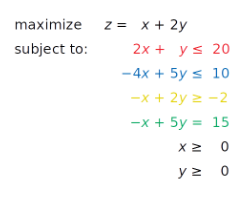

In [2]:
#create model
model = LpProblem(sense = LpMaximize)

In [3]:
# Init decision variable
x = LpVariable(name = 'x', lowBound=0)
y = LpVariable(name = "y", lowBound=0)

In [4]:
# Add the constraints to the model
model += (2 * x + y <= 20, "red_constraint")
model += (4 * x - 5 * y >= -10, "blue_constraint")
model += (-x + 2 * y >= -2, "yellow_constraint")
model += (-x + 5 * y == 15, "green_constraint")

# Add obj function
obj_function = x + 2 * y #or model += lpSum([x, 2 *y])
model += obj_function

In [5]:
model

NoName:
MAXIMIZE
1*x + 2*y + 0
SUBJECT TO
red_constraint: 2 x + y <= 20

blue_constraint: 4 x - 5 y >= -10

yellow_constraint: - x + 2 y >= -2

green_constraint: - x + 5 y = 15

VARIABLES
x Continuous
y Continuous

In [6]:
#solve model
status = model.solve()

In [9]:
print(f"status: {model.status}, {LpStatus[model.status]}")
print(f'objective : {model.objective.value()}')

status: 1, Optimal
objective : 16.8181817


In [10]:
for var in model.variables():
    print(f"{var.name} : {var.value()}")

x : 7.7272727
y : 4.5454545
